!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install sklearn
!pip install tensorflow
!pip install clean-text
!pip install googletrans

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from cleantext import clean
from googletrans import Translator
translator = Translator()

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer



from sklearn import model_selection, metrics, preprocessing, ensemble
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

from fuzzywuzzy import fuzz

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\SAMEER MISHRA\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Reading train dataset

file_path = "C:/Users/SAMEER MISHRA/Desktop/COLLEGE PRACTICAL PROGRAM FILES/6th SEM/Project/Code/Dataset/train.csv"
rdata = pd.read_csv(file_path, encoding = 'unicode_escape', engine ='python')
print("Total Data Row : ", rdata['id'].count())
rdata.head(10)

Total Data Row :  9740


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


Count of 0 in target: 4342
Count of 1 in target: 5398


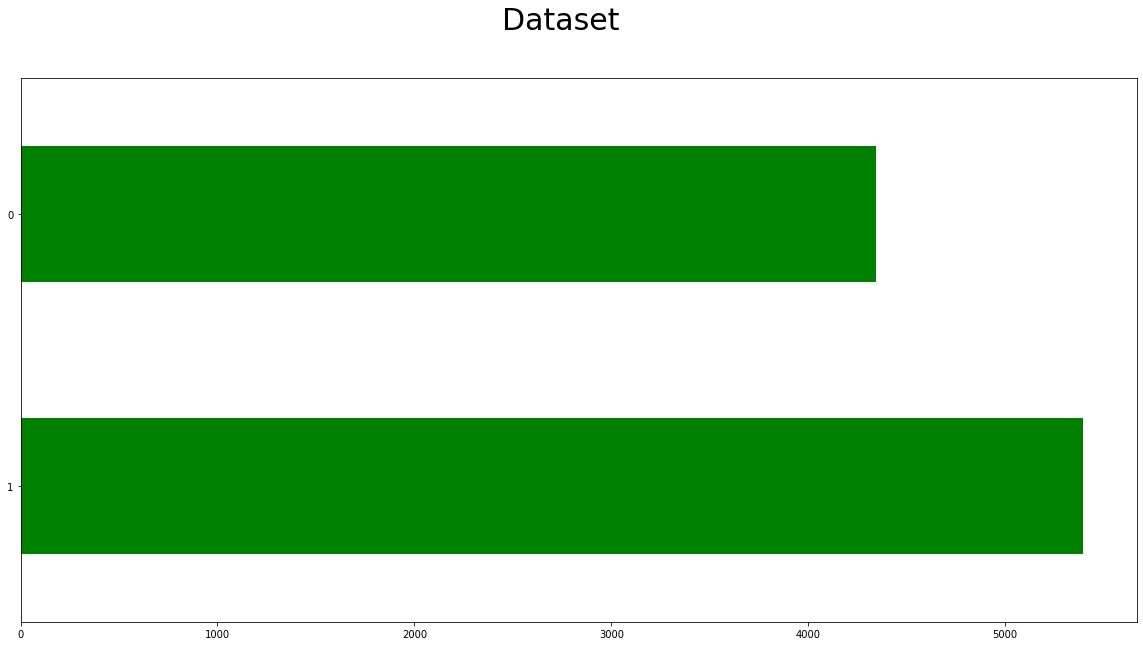

In [3]:
# Plotting target value counts


print("Count of 0 in target:",(rdata['target']==0).sum())
print("Count of 1 in target:",(rdata['target']==1).sum())

plt.figure(figsize=(20,10))
rdata['target'].value_counts().plot(kind="barh",color="green")
plt.suptitle("Dataset", fontsize=30)
plt.show()

In [4]:
#Printing NaN counts

print("NaN in id       : ", rdata['id'].isna().sum())
print("NaN in keyword  : ", rdata['keyword'].isna().sum())
print("NaN in location : ", rdata['location'].isna().sum())
print("NaN in text     : ", rdata['text'].isna().sum())
print("NaN in target   : ", rdata['target'].isna().sum())

NaN in id       :  0
NaN in keyword  :  2188
NaN in location :  4660
NaN in text     :  0
NaN in target   :  0


In [5]:
#Creating new attribute 'word_count'

rdata['word_count'] = rdata['text'].apply(lambda x: len(x.split(" ")) )

In [6]:
# printing rows containing less than 3 words

for i in range(rdata['word_count'].count()):
  if rdata['word_count'][i]<3:
    print(rdata['text'][i])

Love skiing
LOOOOOOL
Cooool :)
The end!
Aftershock https://t.co/xMWODFMtUI
Aftershock https://t.co/jV8ppKhJY7
Apocalypse please
Armageddon https://t.co/uCSUDk3q1d
@paddytomlinson1 ARMAGEDDON
@local_arsonist LMFAO
@kynespeace *blight
Stats http://t.co/U7vavyrGv9
@Blizzard_Gamin ight
Crushed
eggs desolate
Electrocute yourself
Emergency surgery
fatal attraction
Fatality!
fatality
@Babybackreeve FATALITY!!!!!!!!!!
Fatality https://t.co/GF5qjGoyCi
Fatality ????
Flattened https://t.co/9jCIBenckz
hurricane?? sick!
Bad day
Meltdown
Err:509
Obliterated
@BizzleMahomie SCREAMING
@Scalpium SCREAMING
#NoChillLukeHammings
IM SCREAMING
*screams internally*
*screams* http://t.co/PU7C4Hhbxj
@RealJaxClone *screams*
this storm????
:: Survive??
Truth...
https://t.co/h6amECX5K7
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/B8iWRdxcm0
Truth...
https://t.co/nXS3Z1kxiD
#News
#BBC
#CNN
#Islam
#Truth
#god
#ISIS
#terrorism
#Quran
#Lies http://t.co/UDKMAdKuzY
Truth...
https://t.co/b

In [7]:
#Removing the text with less than 3 words

rdata = rdata[rdata['word_count']>2]
rdata = rdata.reset_index()

In [8]:
#Checking whether data is removed or not

flag=0
for i in range(rdata['word_count'].count()):
  if rdata['word_count'][i]<3:
    print(rdata['text'][i])
    flag=1
if flag==0:
  print("0 texts with word (count < 3)")


0 texts with word (count < 3)


In [9]:
# Clean text columns

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean_text(each_text):    
    #removing emoji
    each_text_no_emoji = clean(each_text, no_emoji=True)
    
    #removing URL from text
    each_text_no_url = re.sub(r"http\S+", "", each_text_no_emoji)
        
    # removing numbers from text
    text_no_num = re.sub(r'\d+', '', each_text_no_url)

    # tokenizing each text
    word_tokens = word_tokenize(text_no_num)
    
    # removing special character
    clean_text = []
    for word in word_tokens:
        clean_text.append("".join([z for z in word if z.isalnum()]))

    # removing stop words and lower
    text_with_no_stop_word = [w.lower() for w in clean_text if not w in stop_words]  

    # do stemming
    stemmed_text = [stemmer.stem(w) for w in text_with_no_stop_word]
    
    return " ".join(" ".join(stemmed_text).split())


rdata['clean_text'] = rdata['text'].apply(lambda x: clean_text(x) )
rdata['keyword'] = rdata['keyword'].fillna("none")
rdata['clean_keyword'] = rdata['keyword'].apply(lambda x: clean_text(x) )

In [10]:
# Combine column 'clean_keyword' and 'clean_text' into one

rdata['keyword_text'] = rdata['clean_keyword'] + " " + rdata["clean_text"]

In [11]:
#The Dataset after all actions

rdata.head(10)

,index,id,keyword,location,text,target,word_count,clean_text,clean_keyword,keyword_text
0,0,1,none,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,13,deed reason earthquak may allah forgiv us,none,none deed reason earthquak may allah forgiv us
1,1,4,none,NaN,Forest fire near La Ronge Sask. Canada,1,7,forest fire near la rong sask canada,none,none forest fire near la rong sask canada
2,2,5,none,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,22,resid ask shelter place notifi offic evacu shelter place order expect,none,none resid ask shelter place notifi offic evacu shelter place order expect
3,3,6,none,NaN,"13,000 people receive #wildfires evacuation orders in California",1,9,peopl receiv wildfir evacu order california,none,none peopl receiv wildfir evacu order california
4,4,7,none,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,17,got sent photo rubi alaska smoke wildfir pour school,none,none got sent photo rubi alaska smoke wildfir pour school
5,5,8,none,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,18,rockyfir updat california hwi close direct due lake counti fire cafir wildfir,none,none rockyfir updat california hwi close direct due lake counti fire cafir wildfir
6,6,10,none,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,14,flood disast heavi rain caus flash flood street manitou colorado spring area,none,none flood disast heavi rain caus flash flood street manitou colorado spring area
7,7,13,none,NaN,I'm on top of the hill and I can see a fire in the woods...,1,15,top hill see fire wood,none,none top hill see fire wood
8,8,14,none,NaN,There's an emergency evacuation happening now in the building across the street,1,12,emerg evacu happen build across street,none,none emerg evacu happen build across street
9,9,15,none,NaN,I'm afraid that the tornado is coming to our area...,1,10,afraid tornado come area,none,none afraid tornado come area


# LSTM Model:

In [12]:
feature = 'keyword_text'
label = "target"

# split train and test
X_train, X_test,y_train, y_test = model_selection.train_test_split(rdata[feature],
                                                                   rdata[label],
                                                                   test_size=0.3,
                                                                   random_state=0, 
                                                                   shuffle=True)

In [13]:
# Define some hyperparameters

path_to_glove_file = 'C:/Users/SAMEER MISHRA/Desktop/COLLEGE PRACTICAL PROGRAM FILES/6th SEM/Project/Code/glove.6B/glove.6B.300d.txt'
embedding_dim = 300
learning_rate = 1e-3
batch_size = 1000
epochs = 20
sequence_len = 100

In [14]:
# Define train and test labels

y_train_LSTM = y_train.values.reshape(-1,1)
y_test_LSTM = y_test.values.reshape(-1,1)

print("Training Y shape:", y_train_LSTM.shape)
print("Testing Y shape:", y_test_LSTM.shape)

Training Y shape: (6783, 1)
Testing Y shape: (2908, 1)


In [15]:
# Tokenize train data

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocabulary Size: ", vocab_size)

Vocabulary Size:  10800


In [16]:
# Pad train and test 

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=sequence_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=sequence_len)

print("Training X shape: ", X_train.shape)
print("Testing X shape: ", X_test.shape)

Training X shape:  (6783, 100)
Testing X shape:  (2908, 100)


In [17]:
# Read word embeddings

embeddings_index = {}
with open(path_to_glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [18]:
# Define embedding layer in Keras

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            embedding_dim,
                                            weights=[embedding_matrix],
                                            input_length=sequence_len,
                                            trainable=False)

In [19]:
# Define model architecture

sequence_input = Input(shape=(sequence_len, ), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

x = Conv1D(128, 5, activation='relu')(embedding_sequences)
x = Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          3240000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           192128    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656

In [20]:
# Optimize the model

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the LSTM Model

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_data=(X_test, y_test))

Epoch 1/20
7/7 [==============================] - 54s 7s/step - loss: 0.6325 - accuracy: 0.5909 - val_loss: 0.4669 - val_accuracy: 0.7865
Epoch 2/20
7/7 [==============================] - 57s 8s/step - loss: 0.4471 - accuracy: 0.8055 - val_loss: 0.4105 - val_accuracy: 0.8023
Epoch 3/20
7/7 [==============================] - 80s 11s/step - loss: 0.3849 - accuracy: 0.8338 - val_loss: 0.3930 - val_accuracy: 0.8146
Epoch 4/20
7/7 [==============================] - 92s 13s/step - loss: 0.3578 - accuracy: 0.8411 - val_loss: 0.3900 - val_accuracy: 0.8226
Epoch 5/20
7/7 [==============================] - 90s 13s/step - loss: 0.3289 - accuracy: 0.8570 - val_loss: 0.3819 - val_accuracy: 0.8219
Epoch 6/20
7/7 [==============================] - 89s 13s/step - loss: 0.3042 - accuracy: 0.8703 - val_loss: 0.4014 - val_accuracy: 0.8232
Epoch 7/20
7/7 [==============================] - 88s 13s/step - loss: 0.2782 - accuracy: 0.8822 - val_loss: 0.4200 - val_accuracy: 0.8174
Epoch 8/20
7/7 [=============

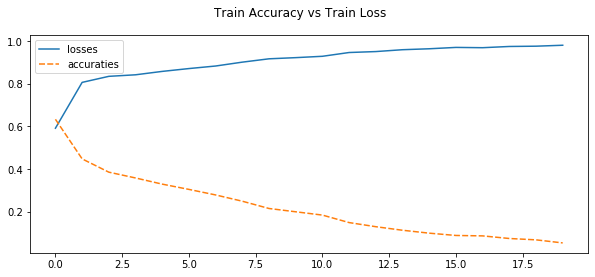

In [22]:
# Plot train accuracy and loss
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuraties", "losses"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

In [23]:
# Evaluate the model

predicted = model.predict(X_test, verbose=1, batch_size=10000)
y_predicted = [1 if each > 0.5 else 0 for each in predicted]
score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

1/1 [==============================] - 3s 3s/step - loss: 0.8069 - accuracy: 0.8088
Test Accuracy:  0.8088033199310303
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1277
           1       0.84      0.81      0.83      1631

    accuracy                           0.81      2908
   macro avg       0.81      0.81      0.81      2908
weighted avg       0.81      0.81      0.81      2908



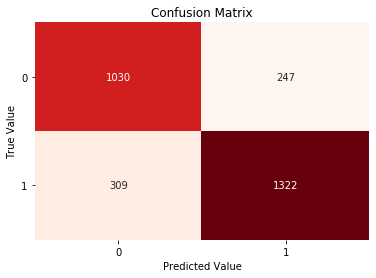

In [24]:
# Plot confusion matrix

conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

In [25]:
#user input:

#Translating text to english
translated_text = translator.translate(input('Enter a string :'),dest="en")   
x = translated_text.text
data = {"id":[16747883],
       "text":x}

userData = pd.DataFrame(data)
userData['clean_text'] = userData['text'].apply(lambda x: clean_text(x) )
x = userData['clean_text'][0]

data = pad_sequences(tokenizer.texts_to_sequences(userData['clean_text']), maxlen=sequence_len)
predicted = model.predict(data, verbose=1, batch_size=10000)
y_predicted = [1 if each > 0.5 else 0 for each in predicted]

new_data = pd.DataFrame()
new_data['Feature'] = userData['text']
new_data['Label'] = y_predicted
display(new_data)

Enter a string :Hon’ble PM Sh.  @narendramodi  virtually interacts with personnel involved in Ropeway Rescue Operation at Deoghar. Hails heroic efforts & coordination of all stakeholders.  Do watch the telecast ⬇️ https://youtu.be/uV6Ta1bRa5Y  #Committed2Serve 🇮🇳  #आपदा_सेवा_सदैव_सर्वत्र 🙏🙏
1/1 [==============================] - 0s 30ms/step


,Feature,Label
0,Hon’ble PM Sh. @narendramodi virtually interacts with personnel involved in Ropeway Rescue Operation at Deoghar. Hails heroic efforts & coordination of all stakeholders. Do watch the telecast ⬇️ https://youtu.be/uV6Ta1bRa5Y #Committed2Serve 🇮🇳 #आपदा_सेवा_सदैव_सर्वत्र 🙏🙏,1


In [26]:
#Input Validation

if y_predicted[0]==1:
    temp = 0
    df1 = pd.read_csv("Dataset/tweets.csv")
    df1 = df1.dropna()
    for t in df1.Tweet:
        temp = max(temp,fuzz.ratio(x,t))
    print('-----------------------')
    print('|  Validity:',temp,"%  |")
    print('-----------------------')
else:
    print("Tweet not related to diaster")

-----------------------
|  Validity: 100 %  |
-----------------------
